## **Clone GitHub**

clonning GitHub to adding dataset model

In [1]:
!git clone https://github.com/Cambara-Project-Bangkit/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 10070, done.
remote: Counting objects: 100% (626/626), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 10070 (delta 560), reused 604 (delta 553), pack-reused 9444
Receiving objects: 100% (10070/10070), 235.23 MiB | 22.20 MiB/s, done.
Resolving deltas: 100% (4358/4358), done.
Updating files: 100% (9882/9882), done.


## **Import Library**

In [2]:
import cv2 as cv
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam

## **Set Dataset Directory**

In [3]:
# dataset path directory
dataset_path = "/content/Machine-Learning/Dataset_Hasil/DatasetAksaraWianjana2"

# Path for  directory for  training and validation data
base_output_path = "/content/Machine-Learning/Dataset_Hasil/DatasetAksaraWianjana2"
train_data_dir = os.path.join(base_output_path, "train_data")
validation_data_dir = os.path.join(base_output_path, "val_data")


## **Spliting Datasets to 80 for training and 20 for Validarion**


In [4]:
# List all class in dataset aksara Wianjana
classes = os.listdir(dataset_path)

# Looping through every class
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)

    # get list file  in each class
    files = os.listdir(class_path)

    # split dataset to training and  validation data, training data(80%) and validation(20%)
    train_files, validation_files = train_test_split(files, test_size=0.2, random_state=42)

    # making new directory
    os.makedirs(os.path.join(train_data_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_data_dir, class_name), exist_ok=True)

    # move file to training data directory
    for file in train_files:
        source_path = os.path.join(class_path, file)
        destination_path = os.path.join(train_data_dir, class_name, file)
        shutil.copyfile(source_path, destination_path)

    # move file to  validation data directory
    for file in validation_files:
        source_path = os.path.join(class_path, file)
        destination_path = os.path.join(validation_data_dir, class_name, file)
        shutil.copyfile(source_path, destination_path)

print("Split  Dataset  to 80% for training and 20% for validation successfully.")

Split  Dataset  to 80% for training and 20% for validation successfully.


## **Data Augmentation**

In [5]:
# Path ke direktori training dan validation
# train_data_dir = '/content/aksara_bali_assets/data_training'
# validation_data_dir = '/content/aksara_bali_assets/data_validation'

img_width, img_height = 64, 64
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=0,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3290 images belonging to 18 classes.
Found 832 images belonging to 18 classes.


## **Importing Pre Trained Model**

This case pre trained models that are imported are : **MobileNet**

In [6]:
# Load MobileNet model pre-trained on ImageNet data
base_model = MobileNet(weights='imagenet', include_top=False, input_shape = (64, 64, 3))

17225924/17225924 [==============================] - 0s 0us/step


## **Making Layer for Model**

In [7]:
# Create a custom model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
# model.add(Flatten())
# model.add()
model.add(Dense(256, activation='relu'))
model.add(Dense(18, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 2, 2, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 18)                4626      
                                                                 
Total params: 3495890 (13.34 MB)
Trainable params: 3474002 (13.25 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


## **Compile Model**

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## **Training The Model**

In [9]:
epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/100
102/102 [==============================] - 30s 97ms/step - loss: 1.6698 - accuracy: 0.5120 - val_loss: 1.8966 - val_accuracy: 0.5096
Epoch 2/100
102/102 [==============================] - 7s 73ms/step - loss: 0.6114 - accuracy: 0.8060 - val_loss: 0.7279 - val_accuracy: 0.8029
Epoch 3/100
102/102 [==============================] - 9s 89ms/step - loss: 0.4191 - accuracy: 0.8760 - val_loss: 0.5227 - val_accuracy: 0.8750
Epoch 4/100
102/102 [==============================] - 9s 90ms/step - loss: 0.3498 - accuracy: 0.8938 - val_loss: 0.3287 - val_accuracy: 0.8906
Epoch 5/100
102/102 [==============================] - 8s 74ms/step - loss: 0.3022 - accuracy: 0.9055 - val_loss: 0.7787 - val_accuracy: 0.8137
Epoch 6/100
102/102 [==============================] - 9s 90ms/step - loss: 0.2549 - accuracy: 0.9248 - val_loss: 0.2078 - val_accuracy: 0.9303
Epoch 7/100
102/102 [==============================] - 10s 95ms/step - loss: 0.2681 - accuracy: 0.9168 - val_loss: 0.3538 - val_accurac

## **Grafic training and validation accuracy**

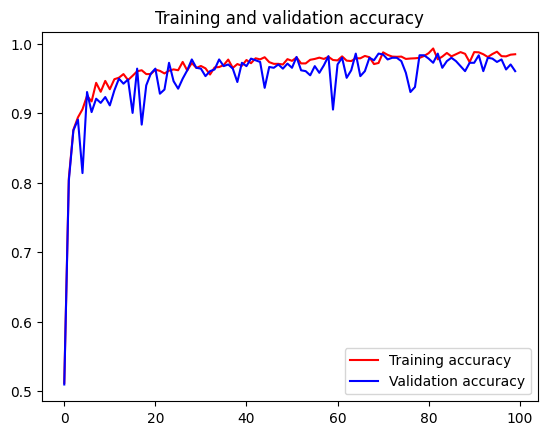

<Figure size 640x480 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## **Check the Accuracy with test data**

In [11]:
train_data_dir = '/content/Machine-Learning/Dataset_Hasil/Data_Test_Aksara'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")

Found 378 images belonging to 18 classes.
12/12 [==============================] - 0s 20ms/step - loss: 0.2145 - accuracy: 0.9444
Test Accuracy: 94.44%


## **Check the Accuracy with confusion matrixs**

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Mendapatkan prediksi dari model
y_pred = model.predict(test_generator)

# Mengubah prediksi probabilitas menjadi kelas yang diprediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Mendapatkan kelas yang sebenarnya
y_true = test_generator.classes

# Membuat matriks konfusi
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(confusion_mtx)

# Menampilkan laporan klasifikasi
class_report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:")
print(class_report)

12/12 [==============================] - 1s 18ms/step
Confusion Matrix:
[[4 0 1 0 0 0 0 4 2 2 2 0 1 1 0 3 1 0]
 [0 1 2 0 2 1 1 0 2 1 2 2 1 2 3 0 1 0]
 [0 0 1 1 0 0 1 2 0 3 2 1 2 2 1 1 3 1]
 [1 2 2 3 1 0 0 0 3 0 0 2 0 2 2 0 3 0]
 [0 1 1 1 2 1 2 0 2 0 1 2 2 3 0 1 1 1]
 [1 1 1 1 1 1 1 0 3 1 0 3 1 2 0 1 2 1]
 [0 3 1 1 1 2 1 0 0 1 0 4 2 0 1 1 1 2]
 [0 0 0 1 0 0 2 3 0 0 4 2 2 1 3 0 3 0]
 [2 1 1 1 0 0 1 2 3 1 2 3 1 1 2 0 0 0]
 [2 1 0 1 2 4 2 3 2 0 0 0 2 0 1 0 0 1]
 [3 0 1 1 1 0 0 1 0 1 0 4 2 2 2 1 1 1]
 [1 2 2 2 2 1 0 0 0 1 1 0 2 0 1 2 2 2]
 [4 1 0 1 1 0 1 0 1 1 1 2 0 2 2 0 1 3]
 [0 1 1 0 1 4 2 0 1 1 2 0 2 0 0 2 2 2]
 [2 1 2 0 3 0 1 0 0 0 1 1 0 1 1 3 1 4]
 [1 0 2 0 2 1 3 1 1 4 1 0 0 0 0 2 2 1]
 [2 4 1 0 1 1 1 1 1 3 0 1 0 1 2 0 1 1]
 [0 1 2 1 1 1 2 2 0 1 1 0 2 1 1 3 1 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.19      0.18        21
           1       0.05      0.05      0.05        21
           2       0.05      0.05     

## **Save Model with h5 format**

In [13]:
model.save('/content/ModelMobileNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# tflite_model = converter.convert()

# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)